In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [87]:
from datetime import datetime

date = datetime.now()
print(f' El programa se ha iniciado en la fecha: {date}')

 El programa se ha iniciado en la fecha: 2023-04-01 23:53:46.364898


In [102]:
def to_csv(nombre,df_):
    today = date.today()
    file_name = f'resultado_{nombre}_{today.strftime("%Y-%m-%d")}.csv'
    df_.to_csv(file_name)

# Escuela Gabriel Pereira

### CURSO DE MATEMÁTICAS

In [89]:

datos_matematicas= pd.read_csv('student-mat.csv',sep=';')
datos_matematicas.dropna(axis=0, how='any', subset=None, inplace=False)


mat=pd.DataFrame(datos_matematicas,columns=['school', 'sex', 'age', 'address', 'Pstatus', 'guardian', 'traveltime', 'studytime', 'failures', 'paid', 'internet', 'health', 'absences','G1','G2','G3'])

#pd.set_option('display.max_rows', None)
#mat.index = np.arange(1, len(mat)+1)


gp_mat= mat.loc[mat['school'] == 'GP']
gp_mat.head()

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10


### GRAFICAS DE GÉNEROS 

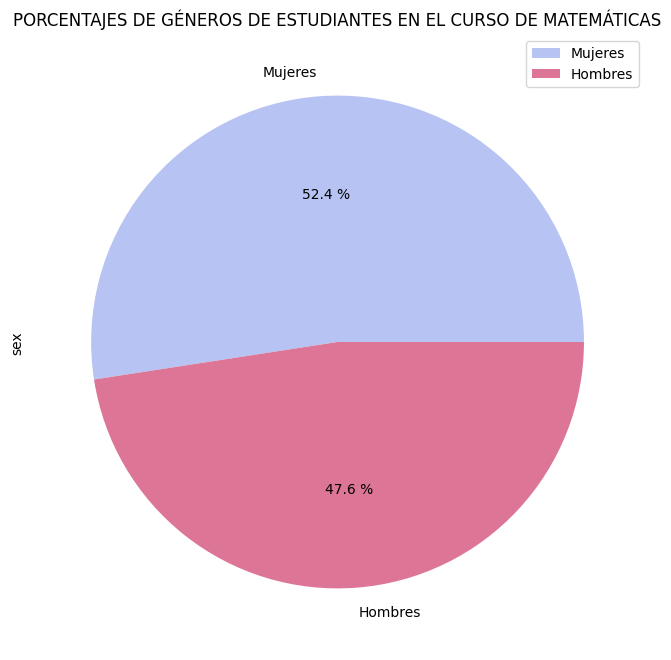

In [90]:
gp_genero_mat = gp_mat.groupby(['sex']).agg({
   'sex': 'count'
})
colores = ["#B7C3F3","#DD7596"]

label=['Mujeres','Hombres']

gp_genero_mat.plot(kind="pie", stacked = True,subplots=True, autopct="%0.1f %%",figsize=(10,8), colors=colores, labels=label)

plt.title('PORCENTAJES DE GÉNEROS DE ESTUDIANTES EN EL CURSO DE MATEMÁTICAS')
    
plt.show()

### PROMEDIO DE EDADES 

In [91]:
promedio_edad=round(gp_mat['age'].mean())
print('El promedio de edad en el curso de matemáticas es de: ', promedio_edad)


El promedio de edad en el curso de matemáticas es de:  17


### PROMEDIO DE NOTAS

Text(0.5, 1.0, 'PROMEDIO VS NOTAS')

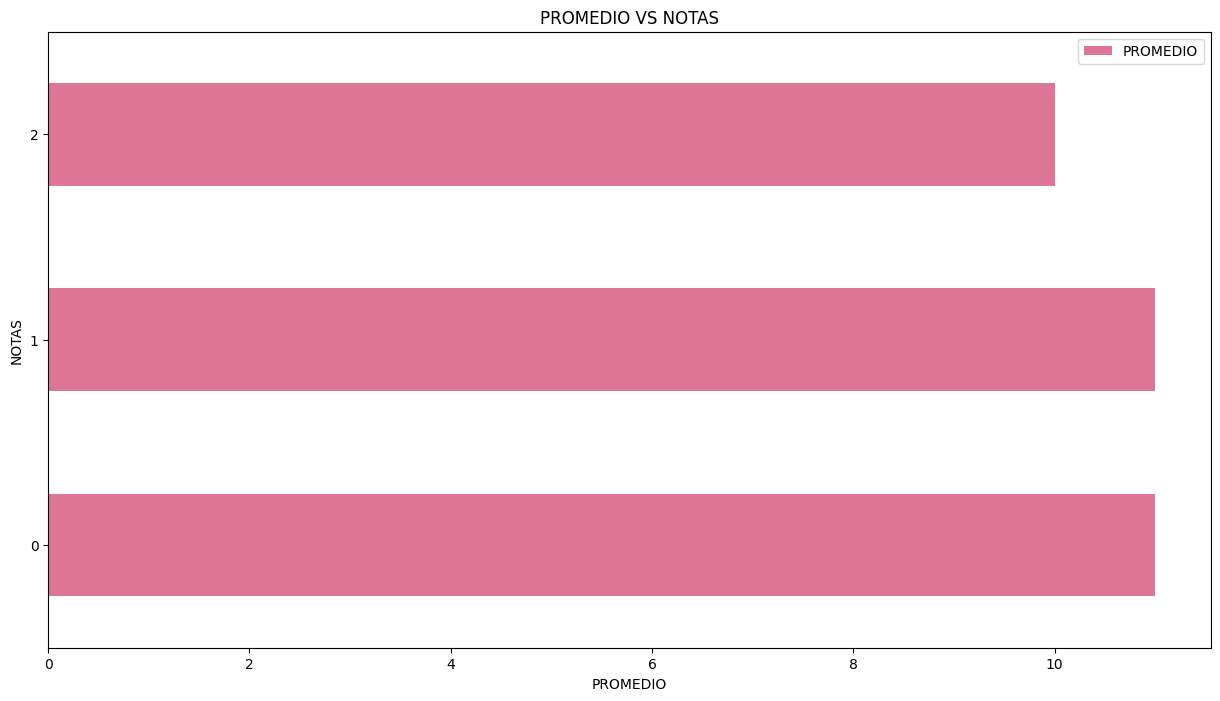

In [92]:
promedio_g1=round(gp_mat['G1'].mean())
promedio_g2=round(gp_mat['G2'].mean())
promedio_g3=round(gp_mat['G3'].mean())



gp_promedio_mat = pd.DataFrame({'NOTAS': ['G1', 'G2', 'G3'], 
                   'PROMEDIO': [promedio_g1,promedio_g2,promedio_g3]}) 

gp_promedio_mat.plot.barh(color='#DD7596',figsize=(15,8)) 

plt.xlabel("PROMEDIO")
plt.ylabel("NOTAS")
plt.title('PROMEDIO VS NOTAS')


### TOTAL DE CLASES

In [93]:
total_clases_gp_mat=gp_mat['absences'].max()

total_clases_gp_mat


75

### PORCENTAJES DE ASISTENCIAS 

In [94]:
gp_mat['extra']= round(((total_clases_gp_mat - gp_mat['absences']) / total_clases_gp_mat) * 100)

gp_mat.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10656\670098349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_mat['extra']= round(((total_clases_gp_mat - gp_mat['absences']) / total_clases_gp_mat) * 100)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6,92.0
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6,95.0
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10,87.0
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15,97.0
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10,95.0


### ESTUDIANTES APROBADOS

In [97]:
condiciones=[
    (gp_mat['extra'] < 80),
    (gp_mat['extra'] > 80) & (gp_mat['G3']<10),
    (gp_mat['extra'] >= 80) & (gp_mat['G3']>=10) & (gp_mat['G3']<15),
    (gp_mat['extra'] >= 80) & (gp_mat['G3']>=15)
     ]

valores=[0,0,1,1]

gp_mat['aprroved']=np.select(condiciones,valores)
to_csv('gp_mat',gp_mat)
gp_mat.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10656\3240170395.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_mat['aprroved']=np.select(condiciones,valores)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,aprroved
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6,92.0,0
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6,95.0,0
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10,87.0,1
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15,97.0,1
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10,95.0,1


### GRAFICA DE ESTUDIANTES APROBADOS

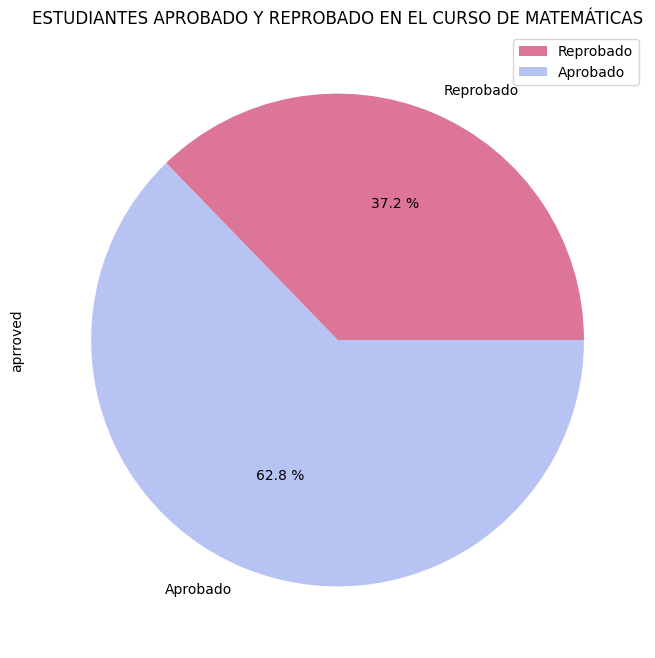

In [ ]:
gp_aprroved_mat = gp_mat.groupby(['aprroved']).agg({
   'aprroved': 'count'
})
label = ['Reprobado','Aprobado']

colores = ["#DD7596","#B7C3F3"]

gp_aprroved_mat.plot(kind="pie",labels=label, stacked = True,subplots=True, autopct="%0.1f %%",figsize=(10,8), colors=colores)

plt.title('ESTUDIANTES APROBADO Y REPROBADO EN EL CURSO DE MATEMÁTICAS')  

plt.show()

### CURSO DE PORTUGUÉS

In [ ]:
datos_portugues = pd.read_csv('student-por.csv',sep=';')
datos_portugues .dropna(axis=0, how='any', subset=None, inplace=False)

port=pd.DataFrame(datos_portugues,columns=['school', 'sex', 'age', 'address', 'Pstatus', 'guardian', 'traveltime', 'studytime', 'failures', 'paid', 'internet', 'health', 'absences','G1','G2','G3'])

#port.index = np.arange(1, len(port)+1)

#pd.set_option('display.max_rows', None)

gp_port= port.loc[port['school'] == 'GP']

gp_port.head()

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
0,GP,F,18,U,A,mother,2,2,0,no,no,3,4,0,11,11
1,GP,F,17,U,T,father,1,2,0,no,yes,3,2,9,11,11
2,GP,F,15,U,T,mother,1,2,0,no,yes,3,6,12,13,12
3,GP,F,15,U,T,mother,1,3,0,no,yes,5,0,14,14,14
4,GP,F,16,U,T,father,1,2,0,no,no,5,0,11,13,13


### GRAFICA DE ESTUDIANTES SEGUN GÉNEROS

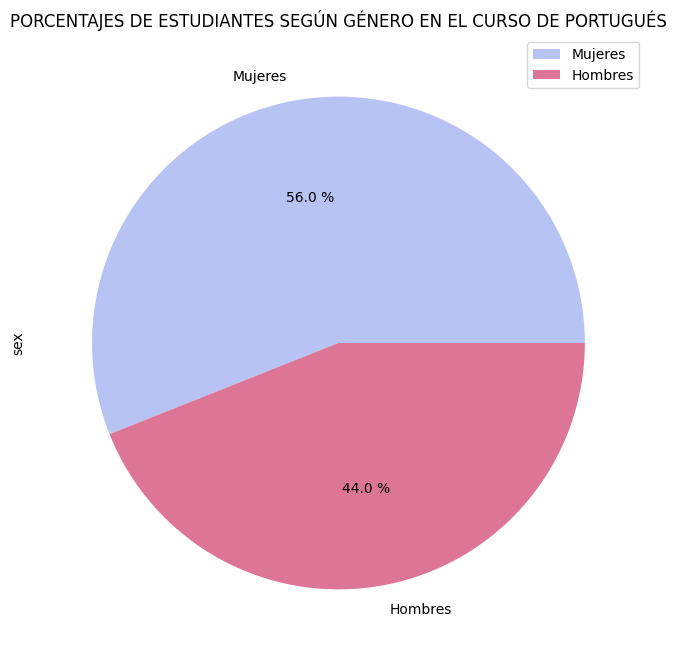

In [ ]:
gp_genero_port= gp_port.groupby(['sex']).agg({
   'sex': 'count'
})
colores = ["#B7C3F3","#DD7596"]
label=['Mujeres','Hombres']

gp_genero_port.plot(kind="pie", stacked = True,subplots=True, autopct="%0.1f %%",figsize=(10,8), colors=colores, labels=label)

plt.title('PORCENTAJES DE ESTUDIANTES SEGÚN GÉNERO EN EL CURSO DE PORTUGUÉS')

plt.show()

### GRAFICA DEL PROMEDIO DE EDADES ESCUELA GABRIEL PEREIRA

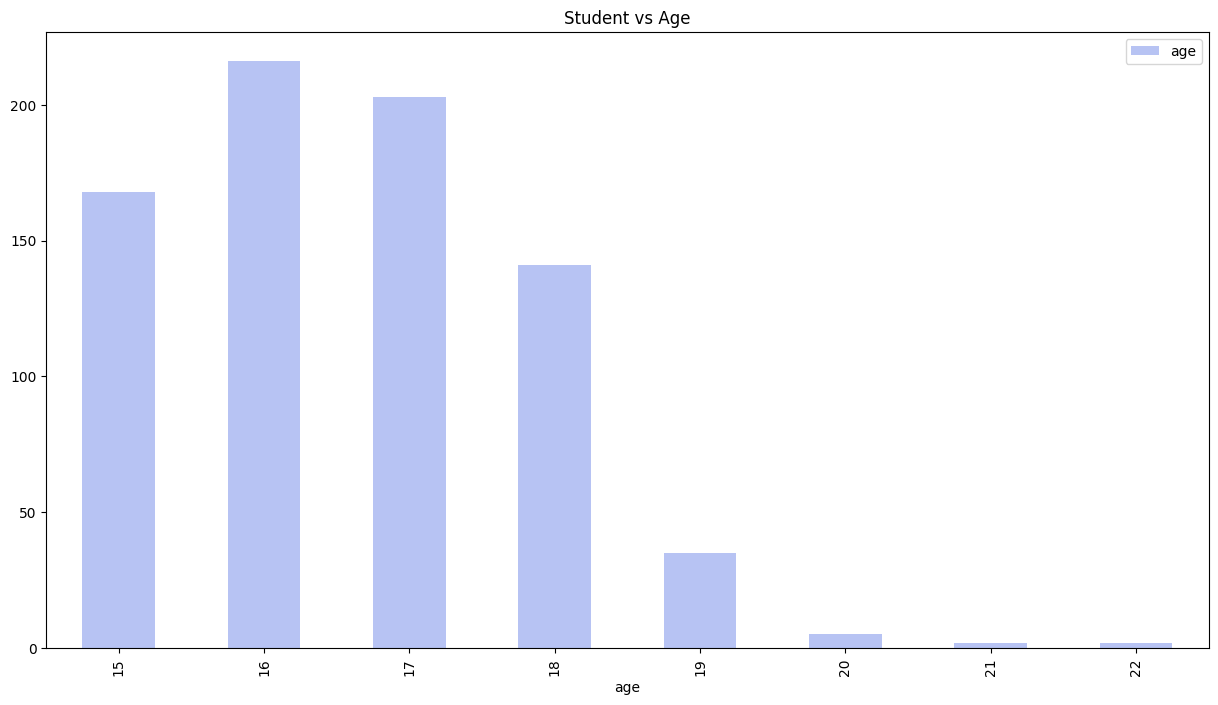

In [ ]:
gp=pd.concat([gp_port,gp_mat])
gp_edad= gp.groupby(['age']).agg({
   'age': 'count'
})

gp_edad.plot(kind="bar", stacked = True,subplots=True,figsize=(15,8), color='#B7C3F3')
plt.title('Student vs Age')
plt.show()

### PROMEDIO DE EDADES DE LA ESCUELA GABRIEL PEREIRA

In [ ]:
gp_promedio_edad=round(gp_port['age'].mean())
print('El promedio de edad en el curso de portugués es de: ', promedio_edad)


El promedio de edad en el curso de portugués es de:  17


### PROMEDIO DE NOTAS

<Axes: ylabel='NOTAS'>

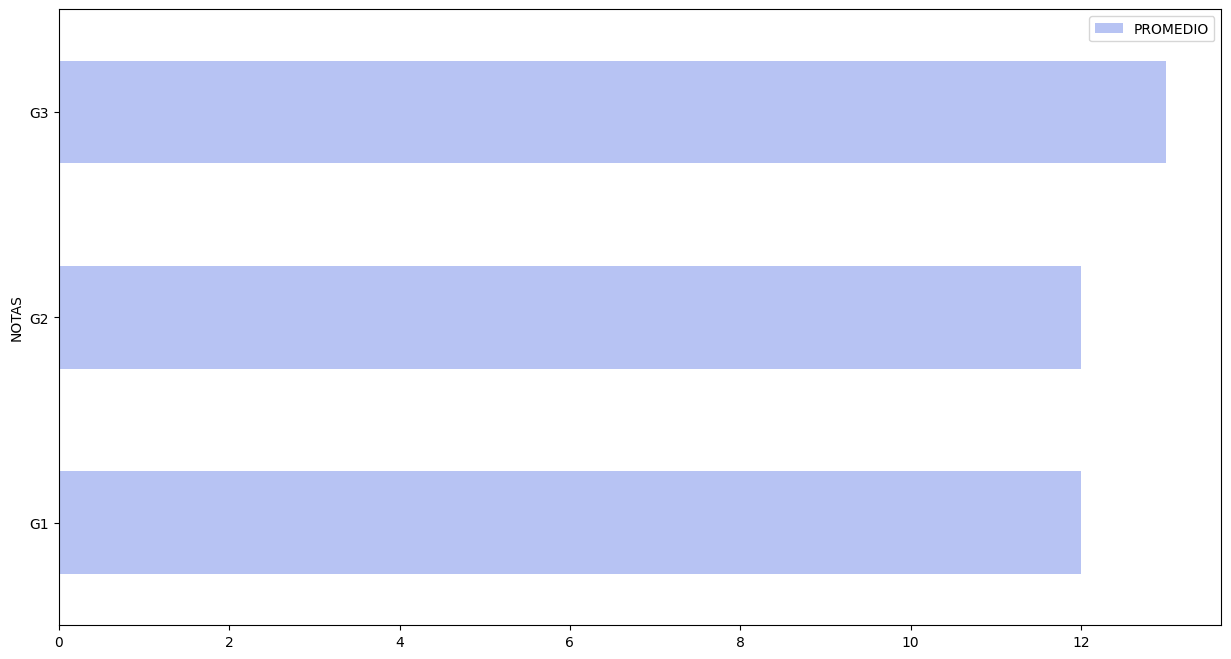

In [ ]:
promedio_g1=round(gp_port['G1'].mean())

promedio_g2=round(gp_port['G2'].mean())

promedio_g3=round(gp_port['G3'].mean())

gp_promedio_port = pd.DataFrame({'NOTAS': ['G1', 'G2', 'G3'], 
                   'PROMEDIO': [promedio_g1,promedio_g2,promedio_g3]}) 

gp_promedio_port.plot.barh(x='NOTAS', y='PROMEDIO', color='#B7C3F3',figsize=(15,8)) 

### TOTAL DE CLASES

In [ ]:
total_clases_gp_port=gp_port['absences'].max()

total_clases_gp_port



32

### PORCENTAJES DE ASISTENCIA

In [ ]:
gp_port['extra']= round(((total_clases_gp_port - gp_port['absences']) / total_clases_gp_port) * 100)

gp_port.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10656\200887048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_port['extra']= round(((total_clases_gp_port - gp_port['absences']) / total_clases_gp_port) * 100)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,aprroved
0,GP,F,18,U,A,mother,2,2,0,no,no,3,4,0,11,11,88.0,1
1,GP,F,17,U,T,father,1,2,0,no,yes,3,2,9,11,11,94.0,1
2,GP,F,15,U,T,mother,1,2,0,no,yes,3,6,12,13,12,81.0,1
3,GP,F,15,U,T,mother,1,3,0,no,yes,5,0,14,14,14,100.0,1
4,GP,F,16,U,T,father,1,2,0,no,no,5,0,11,13,13,100.0,1


### ESTUDIANTES APROBADOS

In [98]:
condiciones=[
    (gp_port['extra'] < 80),
    (gp_port['extra'] > 80) & (gp_port['G3']<10),
    (gp_port['extra'] >= 80) & (gp_port['G3']>=10) & (gp_port['G3']<15),
    (gp_port['extra'] >= 80) & (gp_port['G3']>=15)
     ]

valores=[0,0,1,1]

gp_port['aprroved']=np.select(condiciones,valores)
to_csv('gp_port',gp_port)
gp_port.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10656\84381315.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_port['aprroved']=np.select(condiciones,valores)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,aprroved
0,GP,F,18,U,A,mother,2,2,0,no,no,3,4,0,11,11,88.0,1
1,GP,F,17,U,T,father,1,2,0,no,yes,3,2,9,11,11,94.0,1
2,GP,F,15,U,T,mother,1,2,0,no,yes,3,6,12,13,12,81.0,1
3,GP,F,15,U,T,mother,1,3,0,no,yes,5,0,14,14,14,100.0,1
4,GP,F,16,U,T,father,1,2,0,no,no,5,0,11,13,13,100.0,1


### GRÁFICAS DE ESTUDIANTES APROBADOS

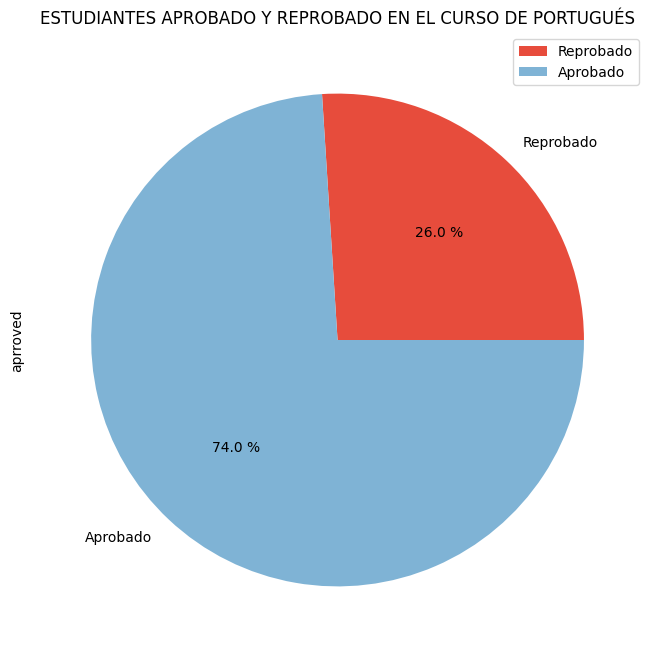

In [ ]:
gp_aprroved_port = gp_port.groupby(['aprroved']).agg({
   'aprroved': 'count'
})
label = ['Reprobado','Aprobado']
colores = ["#E74C3C","#7FB3D5"]


gp_aprroved_port.plot(kind="pie", labels=label, stacked = True,subplots=True, autopct="%0.1f %%",figsize=(10,8),colors=colores)
plt.title('ESTUDIANTES APROBADO Y REPROBADO EN EL CURSO DE PORTUGUÉS')  
plt.show()

# Escuela Mousinho da Silveira

### CURSO DE MATEMÁTICAS

In [ ]:
ms_mat= mat.loc[mat['school'] == 'MS']
ms_mat.index = np.arange(1, len(ms_mat)+1)

ms_mat.head()

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
1,MS,M,18,R,T,mother,2,1,1,no,yes,5,10,11,13,13
2,MS,M,19,R,T,other,3,2,3,no,yes,2,8,8,7,8
3,MS,M,17,U,T,mother,2,2,0,yes,yes,3,2,13,13,13
4,MS,M,18,U,T,mother,1,1,1,no,yes,3,7,8,7,8
5,MS,M,19,R,T,other,3,1,1,no,yes,5,4,8,8,8


### GRAFICAS DE ESTUDIANTES SEGÚN GÉNEROS

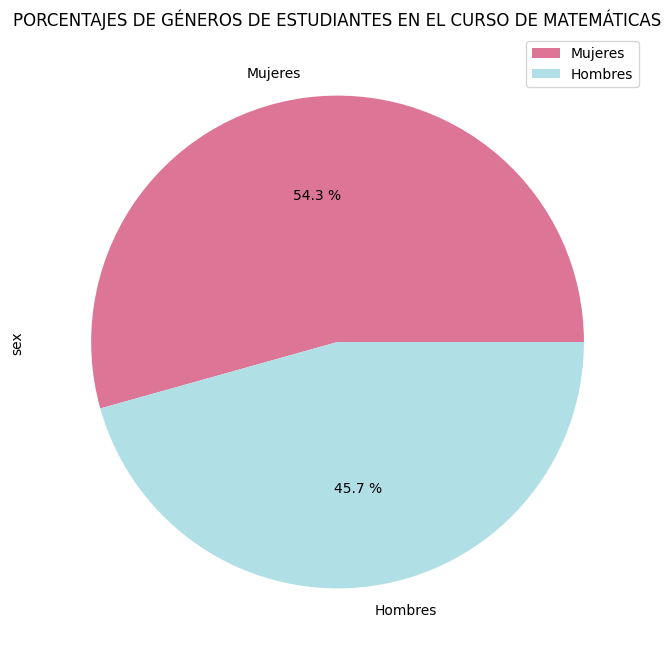

In [ ]:
ms_genero_mat= ms_mat.groupby(['sex']).agg({
   'sex': 'count'
})

colores = ["#DD7596","#B0E0E6"]
label=['Mujeres','Hombres']

ms_genero_mat.plot(kind="pie", stacked = True,subplots=True, autopct="%0.1f %%",figsize=(20,8), colors=colores, labels=label)

plt.title('PORCENTAJES DE GÉNEROS DE ESTUDIANTES EN EL CURSO DE MATEMÁTICAS')

plt.show()

### GRAFICAS DE EDADES ESCUELA Mousinho da Silveira

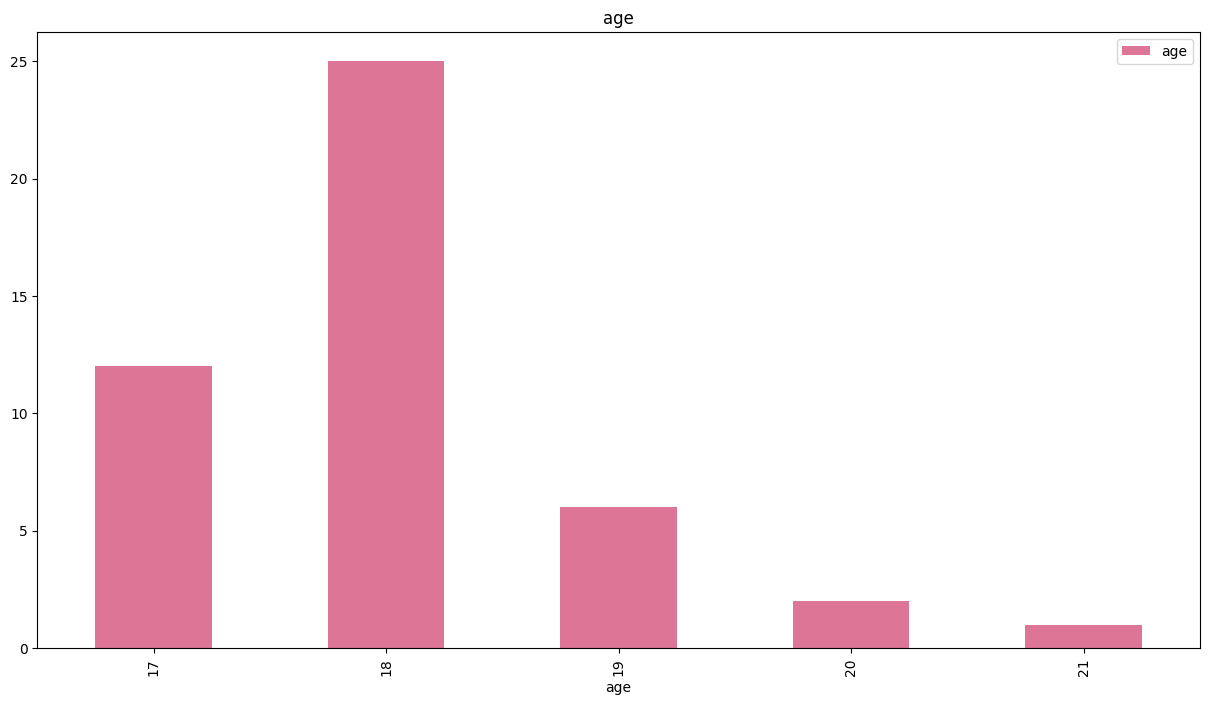

In [ ]:
ms_edad_mat= ms_mat.groupby(['age']).agg({
   'age': 'count'
})

ms_edad_mat.plot(kind="bar", stacked = True, subplots=True, color='#DD7596', figsize=(15,8))



plt.show()

### PROMEDIO DE EDADES DE LA ESCUELA Mousinho da Silveira

In [ ]:
ms_promedio_edad=round(ms_mat['age'].mean())
print('El promedio de edad en el curso de mateamática es de: ', ms_promedio_edad)


El promedio de edad en el curso de mateamática es de:  18


### PROMEDIO DE NOTAS

<Axes: ylabel='NOTAS'>

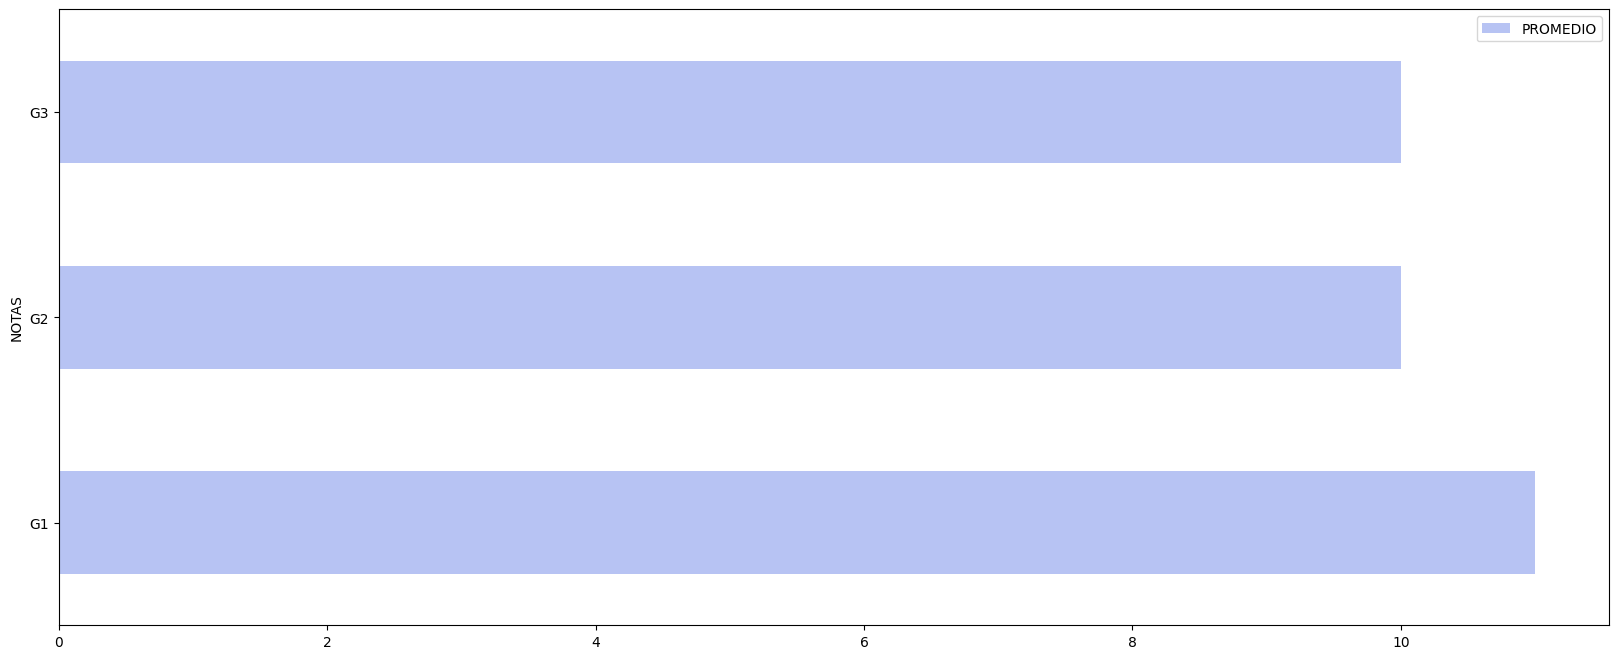

In [ ]:
promedio_g1=round(ms_mat['G1'].mean())
promedio_g2=round(ms_mat['G2'].mean())
promedio_g3=round(ms_mat['G3'].mean())

ms_promedio_mat = pd.DataFrame({'NOTAS': ['G1', 'G2', 'G3'], 
                   'PROMEDIO': [promedio_g1,promedio_g2,promedio_g3]}) 
  
ms_promedio_mat.plot.barh(x='NOTAS', y='PROMEDIO', color='#B7C3F3',figsize=(20,8)) 

### TOTAL DE CLASES

In [ ]:
total_clases_ms_mat=ms_mat['absences'].max()

total_clases_ms_mat


17

### TOTAL PORCENTAJES DE ASISTENCIAS

In [ ]:
ms_mat['extra']= round(((total_clases_ms_mat - ms_mat['absences']) / total_clases_ms_mat) * 100)

ms_mat.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10656\1343559880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_mat['extra']= round(((total_clases_ms_mat - ms_mat['absences']) / total_clases_ms_mat) * 100)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra
1,MS,M,18,R,T,mother,2,1,1,no,yes,5,10,11,13,13,41.0
2,MS,M,19,R,T,other,3,2,3,no,yes,2,8,8,7,8,53.0
3,MS,M,17,U,T,mother,2,2,0,yes,yes,3,2,13,13,13,88.0
4,MS,M,18,U,T,mother,1,1,1,no,yes,3,7,8,7,8,59.0
5,MS,M,19,R,T,other,3,1,1,no,yes,5,4,8,8,8,76.0


### ESTUDIANTES APROBADOS

In [99]:
condiciones=[
    (ms_mat['extra'] < 80),
    (ms_mat['extra'] > 80) & (ms_mat['G3']<10),
    (ms_mat['extra'] >= 80) & (ms_mat['G3']>=10) & (ms_mat['G3']<15),
    (ms_mat['extra'] >= 80) & (ms_mat['G3']>=15)
     ]

valores=[0,0,1,1]

ms_mat['aprroved']=np.select(condiciones,valores)
to_csv('ms_mat',ms_mat)
ms_mat.head()

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,aprroved
1,MS,M,18,R,T,mother,2,1,1,no,yes,5,10,11,13,13,41.0,0
2,MS,M,19,R,T,other,3,2,3,no,yes,2,8,8,7,8,53.0,0
3,MS,M,17,U,T,mother,2,2,0,yes,yes,3,2,13,13,13,88.0,1
4,MS,M,18,U,T,mother,1,1,1,no,yes,3,7,8,7,8,59.0,0
5,MS,M,19,R,T,other,3,1,1,no,yes,5,4,8,8,8,76.0,0


### GRÁFICAS DE ESTUDIANTES APROBADOS

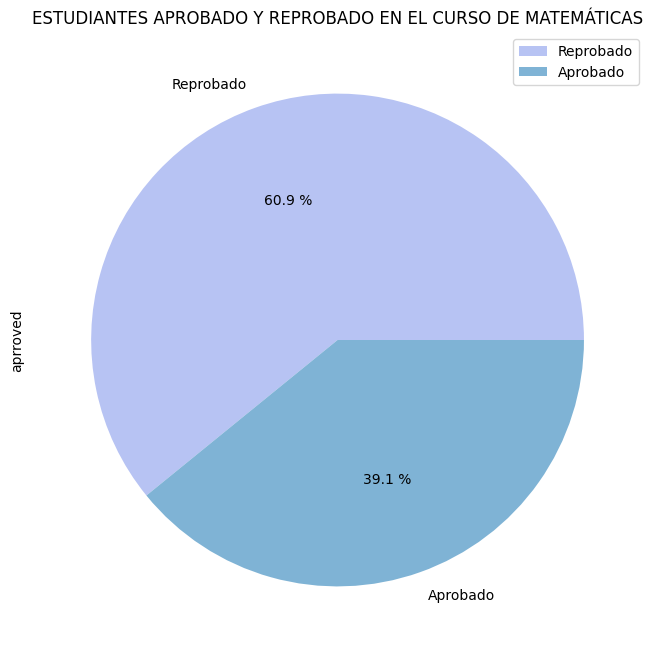

In [ ]:
ms_aprroved_mat = ms_mat.groupby(['aprroved']).agg({
   'aprroved': 'count'
})
label = ['Reprobado','Aprobado']
colores = ["#B7C3F3","#7FB3D5"]

ms_aprroved_mat.plot(kind="pie", labels=label, stacked = True,subplots=True, autopct="%0.1f %%",figsize=(10,8),colors=colores)
plt.title('ESTUDIANTES APROBADO Y REPROBADO EN EL CURSO DE MATEMÁTICAS')  
plt.show()

### CURSO DE PORTUGUÉS

In [ ]:
ms_port= port.loc[port['school'] == 'MS']
ms_port.index = np.arange(1, len(ms_port)+1)

ms_port.head()

,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
1,MS,F,16,U,T,father,2,1,0,no,yes,5,11,10,11,11
2,MS,F,16,R,T,mother,2,2,0,no,yes,5,0,12,12,12
3,MS,F,15,R,T,mother,1,1,1,no,no,2,6,10,10,10
4,MS,F,15,R,T,mother,2,1,0,no,yes,5,4,10,10,11
5,MS,F,16,R,T,mother,2,2,0,no,no,5,0,16,17,17


### GRÁFICA DE ESTUDIANTES SEGÚN GÉNEROS

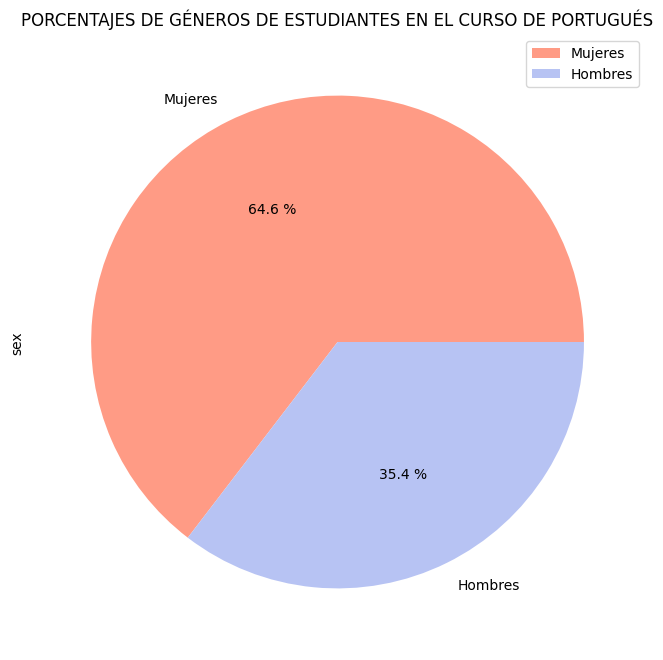

In [ ]:
ms_genero_port= ms_port.groupby(['sex']).agg({
   'sex': 'count'
})

colores = ["#FF9B85","#B7C3F3"]
label=['Mujeres','Hombres'] 

ms_genero_port.plot(kind="pie", stacked = True,subplots=True, autopct="%0.1f %%",figsize=(20,8), colors=colores, labels=label)

plt.title('PORCENTAJES DE GÉNEROS DE ESTUDIANTES EN EL CURSO DE PORTUGUÉS')

plt.show()

### PROMEDIO DE EDADES EN EL CURSO DE PORTUGUÉS

In [ ]:
ms_promedio_edad=round(ms_port['age'].mean())
print('El promedio de edad en el curso de portugués es de: ', ms_promedio_edad)


El promedio de edad en el curso de portugués es de:  17


### GRÁFICA DEL PROMEDIO DE NOTAS

<Axes: ylabel='NOTAS'>

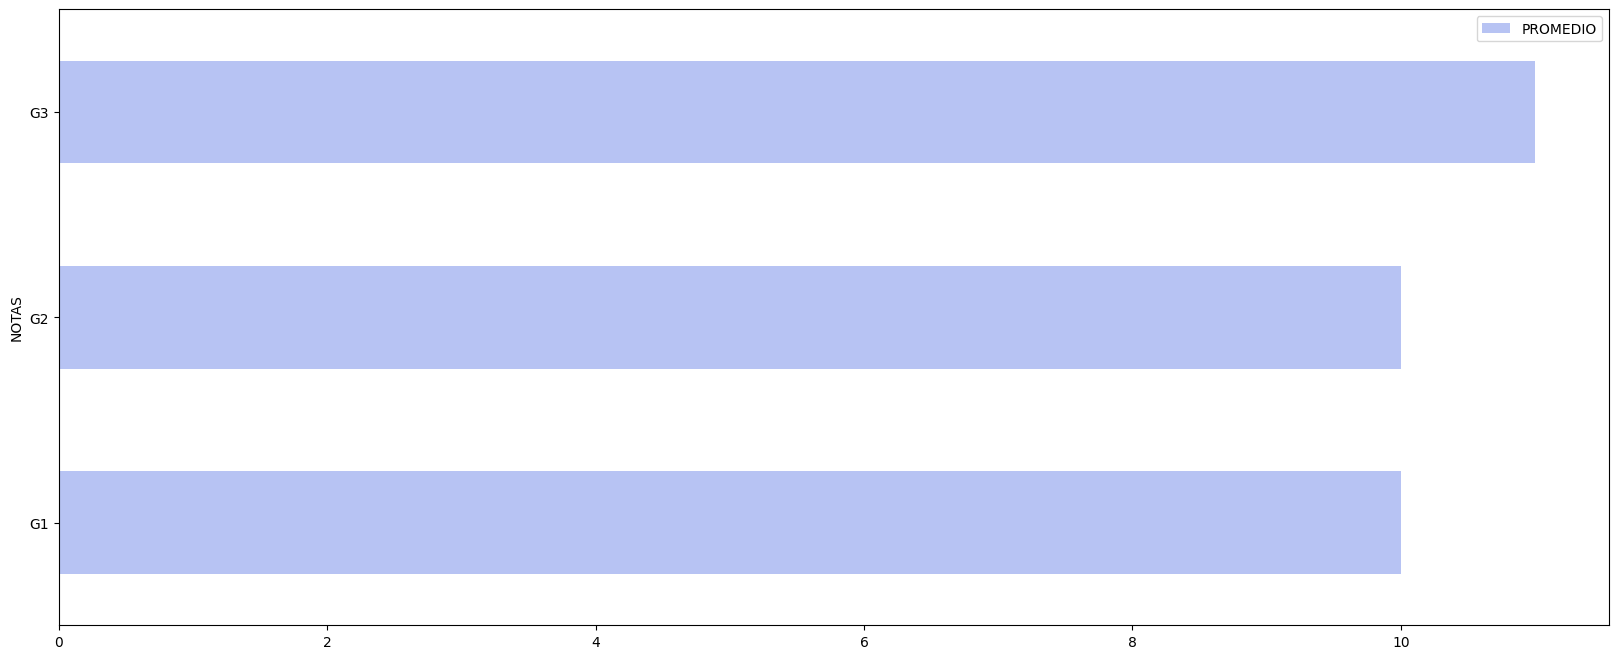

In [ ]:
promedio_g1=round(ms_port['G1'].mean())
promedio_g2=round(ms_port['G2'].mean())
promedio_g3=round(ms_port['G3'].mean())

ms_promedio_port = pd.DataFrame({'NOTAS': ['G1', 'G2', 'G3'], 
                   'PROMEDIO': [promedio_g1,promedio_g2,promedio_g3]}) 
  
ms_promedio_port.plot.barh(x='NOTAS', y='PROMEDIO', color='#B7C3F3',figsize=(20,8)) 

## TOTAL DE CLASES

In [ ]:
total_clases_ms_port=ms_port['absences'].max()

total_clases_ms_port

12

### PORCENTAJE DE ASISTENCIA

In [ ]:
total_clases_ms_port=ms_port['absences'].max()

total_clases_ms_port

ms_port['extra']= round(((total_clases_ms_port - ms_port['absences']) / total_clases_ms_port) * 100)

ms_port.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10656\2024593966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_port['extra']= round(((total_clases_ms_port - ms_port['absences']) / total_clases_ms_port) * 100)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra
1,MS,F,16,U,T,father,2,1,0,no,yes,5,11,10,11,11,8.0
2,MS,F,16,R,T,mother,2,2,0,no,yes,5,0,12,12,12,100.0
3,MS,F,15,R,T,mother,1,1,1,no,no,2,6,10,10,10,50.0
4,MS,F,15,R,T,mother,2,1,0,no,yes,5,4,10,10,11,67.0
5,MS,F,16,R,T,mother,2,2,0,no,no,5,0,16,17,17,100.0


### ESTUDIANTES APROBADOS

In [100]:
condiciones=[
    (ms_port['extra'] < 80),
    (ms_port['extra'] > 80) & (ms_port['G3']<10),
    (ms_port['extra'] >= 80) & (ms_port['G3']>=10) & (ms_port['G3']<15),
    (ms_port['extra'] >= 80) & (ms_port['G3']>=15)
     ]

valores=[0,0,1,1]

ms_port['aprroved']=np.select(condiciones,valores)
to_csv('ms_port',ms_port)
ms_port.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10656\1778244796.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_port['aprroved']=np.select(condiciones,valores)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,aprroved
1,MS,F,16,U,T,father,2,1,0,no,yes,5,11,10,11,11,8.0,0
2,MS,F,16,R,T,mother,2,2,0,no,yes,5,0,12,12,12,100.0,1
3,MS,F,15,R,T,mother,1,1,1,no,no,2,6,10,10,10,50.0,0
4,MS,F,15,R,T,mother,2,1,0,no,yes,5,4,10,10,11,67.0,0
5,MS,F,16,R,T,mother,2,2,0,no,no,5,0,16,17,17,100.0,1


### GRÁFICAS DE ESTUDIANTES APROBADOS

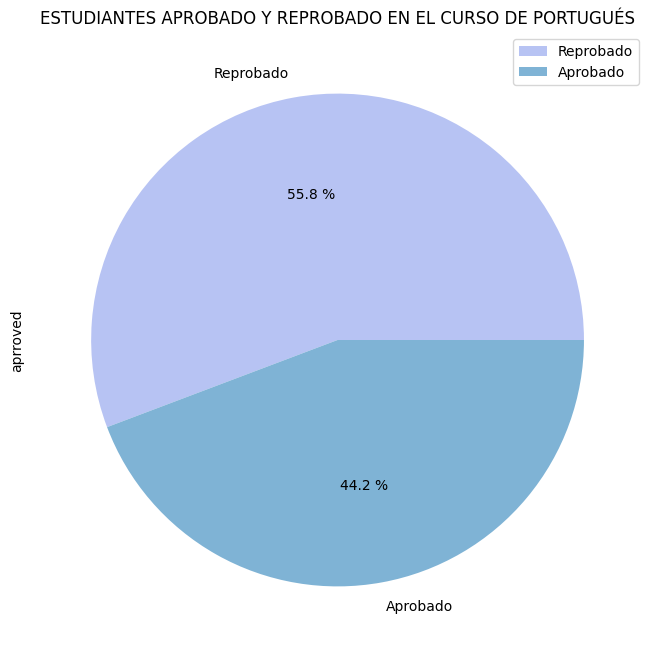

In [ ]:
ms_aprroved_port = ms_port.groupby(['aprroved']).agg({
   'aprroved': 'count'
})
label = ['Reprobado','Aprobado']
colores = ["#B7C3F3","#7FB3D5"]

ms_aprroved_port.plot(kind="pie", labels=label, stacked = True,subplots=True, autopct="%0.1f %%",figsize=(10,8),colors=colores)

plt.title('ESTUDIANTES APROBADO Y REPROBADO EN EL CURSO DE PORTUGUÉS') 

plt.show()